In [1]:
import scanpy as sc
import pandas as pd
import numpy as np

In [38]:
data_pred = sc.read_h5ad('../babel/mymodel/atac_rna_test_preds.h5ad')
data_test = sc.read_h5ad('../babel/mymodel/truth_rna.h5ad')
meta = pd.read_csv('../scButterfly/data/lymphoma/annotated_cell_types_lymphoma.csv', index_col="Barcode")
#data_train = sc.read_h5ad('../babel/mymodel2/train_atac.h5ad')


/usr/local/lib/python3.9/site-packages/anndata/compat/__init__.py:229: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(
/usr/local/lib/python3.9/site-packages/anndata/compat/__init__.py:229: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  warn(


In [25]:
meta.reindex(data_pred.obs_names)

,Cell Types
index,
GTAGGATCATTAAACC-1,Tumor B
AGCCGCTAGTTTGAGC-1,T
TCAATCGCAGTAGGTG-1,T
GTAGTTTCACGAACAG-1,Mono
AGCGATTTCACTTTAC-1,low GEX mix
...,...
TATTTGCTCCTAAATG-1,T
GAGCATGCAATATAGG-1,Tumor B
ACCTTCATCTAGCTAA-1,T


In [40]:
data_pred.obs['cell_type'] = meta.reindex(data_pred.obs_names)
data_test.obs['cell_type'] = meta.reindex(data_test.obs_names)

In [41]:
def process_data(RNA_data):
    # sc.pp.normalize_total(RNA_data, target_sum=1e6)
    # sc.pp.log1p(RNA_data)
    sc.pp.highly_variable_genes(RNA_data, n_top_genes=3000)
    sc.pp.pca(RNA_data, n_comps=50)
    sc.pp.neighbors(RNA_data, n_neighbors=15, use_rep='X_pca')
    sc.tl.umap(RNA_data, random_state=22)
    #sc.tl.leiden(RNA_data, flavor="igraph", n_iterations=2, resolution=1, key_added="leiden_1")
    sc.pl.umap(RNA_data, color=["cell_type"], size=17)

/usr/local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


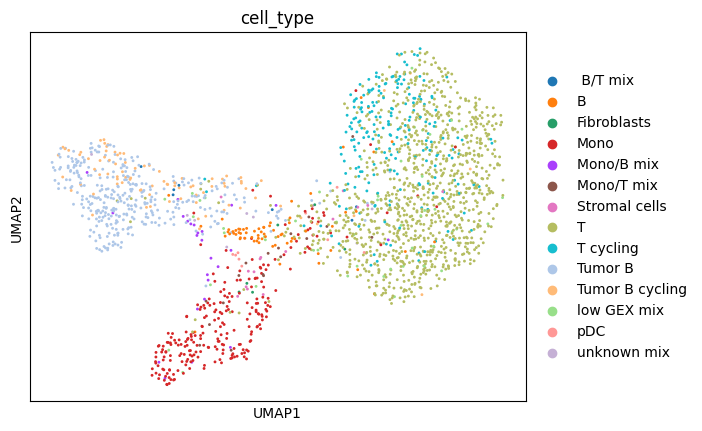

In [42]:
process_data(data_pred)

/usr/local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


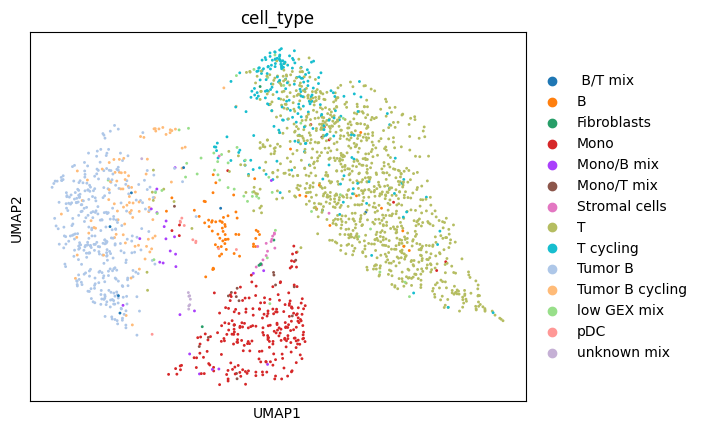

In [43]:
sc.pl.umap(data_test, color=["cell_type"], size=17)

In [ ]:
data_test.var_names

Index(['MIR1302-2HG', 'FAM138A', 'OR4F5', 'AL627309.1', 'AL627309.3',
       'AL627309.2', 'AL627309.5', 'AL627309.4', 'AP006222.2', 'AL732372.1',
       ...
       'PNPLA7', 'MRPL41', 'DPH7', 'ZMYND19', 'ARRDC1', 'ARRDC1-AS1', 'EHMT1',
       'AL772363.1', 'CACNA1B', 'AL954642.1'],
      dtype='object', name='index', length=34861)